<a href="https://colab.research.google.com/github/vinosraj/Project-01-Supermarket-Analysis/blob/main/File_Copy_of_Project_1_Final_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1- FINAL


*   Vino Raj
*   03/03/2022




1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  
3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.

###IMPORTS

In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
import numpy as np

###LOAD DATA

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2 :Pandas/data/sales_predictions.csv'

df = pd.read_csv(filename)


In [ ]:
# Take a look at the first five rows of the dataframe

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Look at the info from the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### PREPROCESSING DATA FOR ML

In [ ]:
# Are there duplicates? If so, drop any duplicates.

df.duplicated().any()

False

In [ ]:
#Identify missing values.

In [ ]:
null_vals = df.isna().sum()
null_vals[null_vals>0].index

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

Will use simpleImputer with Mean for ItemWeight (numerical) and Frequency for Outlet Size (catergorical)

In [ ]:
#dealing with ordinal datatype. The three are Outlet_Location_Type, Outlet_Size, Outlet_Type, using replace method

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1,  'Tier 3':2}, inplace=True)
df['Outlet_Size'].replace({'Small':0, 'Medium':1,  'High':2}, inplace=True)
df['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1':1,  'Supermarket Type2':2,'Supermarket Type3':3}, inplace=True)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,0,1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,0,1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,2,1,994.7052


Finding in consistant catergories



In [ ]:
data_types = df.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

I will drop the rows for Outlet Identifier and Item Identifier

#Fix naming error for:
Item_Fat_Content:

Low Fat   
Regular    
LF          
reg         
low fat     

In [ ]:

repl_map ={'LF':'Low Fat',
           'low fat': 'Low Fat',
           'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(repl_map)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,0,1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,0,1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,2,1,994.7052




##Moving to Machine Learning Data preparation

Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
Perform a train test split 
Create a pre processing pipeline to prepare the dataset for Machine Learning


In [ ]:
#Define features (X) and target (y).
X = df.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

#Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   float64
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 599.4+ KB


In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
scaler = StandardScaler()
ohe_encoder= OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, ohe_encoder)

In [ ]:
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

In [ ]:
col_transformer = make_column_transformer (num_tuple, cat_tuple, remainder='passthrough')


In [ ]:
X_train_processed = col_transformer.fit(X_train)

In [ ]:
col_transformer.named_transformers_

cat_pipe = col_transformer.named_transformers_['pipeline-2']
cat_pipe.named_steps['onehotencoder'].get_feature_names_out(cat_selector(X_train))

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'], dtype=object)

In [ ]:
cat_feature_names = col_transformer.named_transformers_['pipeline-2']\
                               .named_steps['onehotencoder']\
                               .get_feature_names_out(cat_selector(X_train))

In [ ]:
final_cols = num_selector(X_train) + list(cat_feature_names)
final_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods']

In [ ]:
# Transform the X_train and the X_test

X_train_transformed = col_transformer.transform(X_train)

X_test_transformed = col_transformer.transform(X_test)


In [ ]:
X_train_out_put =pd.DataFrame(X_train_transformed, columns = final_cols)
X_test_out_put =pd.DataFrame(X_test_transformed, columns = final_cols)

Output of pre processed data

In [ ]:
X_train_out_put.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.817249,-0.712775,1.828109,1.327849,0.407785,1.084948,0.983572,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.407785,1.084948,0.983572,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.407785,-1.384777,-0.263600,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,-1.291630,-0.149914,-0.263600,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,0.000000,-0.149914,-0.263600,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#FOR EASE OF NAMING BELOW

X_train_final = X_train_out_put
X_test_final = X_test_out_put 

### MACHINE LEARNING SECTION

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.

In [ ]:
#ML IMPORTS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import make_pipeline

####BASELINE BUILD FOR COMPARISION

In [ ]:
dummy = DummyRegressor(strategy='mean')
base_pipe = make_pipeline(col_transformer, dummy)

base_pipe.fit(X_train_final, y_train);

In [ ]:
def eval_model(true, pred):
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'RMSE: {rmse},\n R^2: {r2}')

In [ ]:
print('Baseline Train Evaluation')
eval_model(y_train, base_pipe.predict(X_train_final))

print('\n Baseline Test Evaluation')
eval_model(y_test, base_pipe.predict(X_test_final))

Baseline Train Evaluation
RMSE: 1720.306863477141,
 R^2: 0.0

 Baseline Test Evaluation
RMSE: 1664.9758144520788,
 R^2: -0.004772483978719766


### Building a linear regression model and evaluatings the performance based on R2 and RMSE

##Linear regression model

In [ ]:
lin_reg_pipe = make_pipeline(col_transformer, LinearRegression())
lin_reg_pipe.fit(X_train_final, y_train);

In [ ]:
print('Linear regression Train Evaluation')
eval_model(y_train, lin_reg_pipe.predict(X_train_final))

print('\nLinear regression Test Evaluation')
eval_model(y_test, lin_reg_pipe.predict(X_test_final))

Linear regression Train Evaluation
RMSE: 1208.7846641860108,
 R^2: 0.5062739536407297

Linear regression Test Evaluation
RMSE: 1168.3620339958718,
 R^2: 0.5052261399483355


2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.

Compare the performance of your model based on r^2.

Compare the performance of your model based on rmse.  

##Decision Tree regression model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=None)
reg_tree_pipe = make_pipeline(col_transformer, reg_tree)
reg_tree_pipe.fit(X_train_final, y_train)

print('Training Scores for Regression Tree Model - unoptimized')

eval_model(y_train, reg_tree_pipe.predict(X_train_final))

print('\n')

print('Testing Scores for Regression Tree Model - unoptimized')

eval_model(y_test, reg_tree_pipe.predict(X_test_final))

Training Scores for Regression Tree Model - unoptimized
RMSE: 0.0,
 R^2: 1.0


Testing Scores for Regression Tree Model - unoptimized
RMSE: 1508.9911505959644,
 R^2: 0.17467450615109759


This has a high level of variance and high bias for the test scores. 

In [ ]:
reg_tree.get_depth()

40

Lets see if we can optimize the model 

In [ ]:
#creare a range of max_depth

depths = range(1,reg_tree.get_depth() )

#create a dataframe to store train and test  scores

scores = pd.DataFrame(columns = ['Train','Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(max_depth=n)

  #put the model in a pipeline
  tree_pipe = make_pipeline(col_transformer, tree)

  #fit the model
  tree_pipe.fit(X_train_final, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train_final)
  test_pred = tree_pipe.predict(X_test_final)

  #evaluate the model using the R2 score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in a data frame
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score


In [ ]:
import matplotlib.pyplot as plt


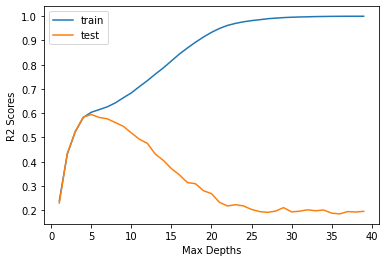

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
best_depth = scores.sort_values(by='Test', ascending = False).index[0]
best_depth

5

In [ ]:
best_tree = DecisionTreeRegressor(max_depth=best_depth)

best_tree_pipe = make_pipeline(col_transformer, best_tree)

best_tree_pipe.fit(X_train_final, y_train)

print('Training Scores for Regression Tree optimized')

eval_model(y_train, best_tree_pipe.predict(X_train_final))

print('\n')

print('Testing Scores for Regression Tree optimized')

eval_model(y_test, best_tree_pipe.predict(X_test_final))

Training Scores for Regression Tree optimized
RMSE: 1082.6461900869947,
 R^2: 0.6039397477322956


Testing Scores for Regression Tree optimized
RMSE: 1057.4431299496734,
 R^2: 0.5947099753159972


##Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#create a range of max_depth values
depths = range(1, 20, 2)

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  tree = RandomForestRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  tree_pipe = make_pipeline(col_transformer, tree)
  
  #fit the model
  tree_pipe.fit(X_train_final, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train_final)
  test_pred = tree_pipe.predict(X_test_final)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

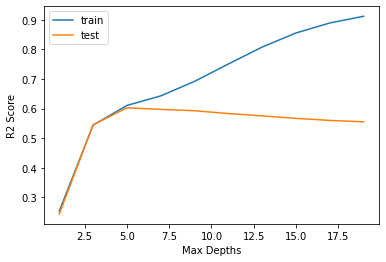

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label='train')
plt.plot(depths, scores['Test'], label='test')
plt.ylabel('R2 Score')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

Optimizing

In [ ]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth_rf = scores.sort_values(by='Test', ascending=False).index[0]
best_depth_rf

5

In [ ]:
#create and fit a final model using the best value for max_depth
best_tree_rf = RandomForestRegressor(max_depth=best_depth_rf, random_state=42)
best_tree__rf_pipe = make_pipeline(col_transformer, best_tree_rf)
best_tree__rf_pipe.fit(X_train_final, y_train)

#evaluate the final model
print(f'Training Scores for Random Forest')
eval_model(y_train, best_tree__rf_pipe.predict(X_train_final))

print('\n')

print(f'Testing Scores for Random Forest')
eval_model(y_test, best_tree__rf_pipe.predict(X_test_final))

print('\n')

Training Scores for Random Forest
RMSE: 1073.5880907659232,
 R^2: 0.610539401934111


Testing Scores for Random Forest
RMSE: 1047.1447535477866,
 R^2: 0.6025657261737136




##Comparing R2 and RMSE for all models


In [ ]:
print('Training and Testing scored Comparison')

print('\n BASELINE \n')

print('Baseline Train Evaluation')
eval_model(y_train, base_pipe.predict(X_train_final))
print('\n Baseline Test Evaluation')
eval_model(y_test, base_pipe.predict(X_test_final))

print('\n LINEAR REGRESSION \n')

print('Linear regression Train Evaluation')
eval_model(y_train, lin_reg_pipe.predict(X_train_final))
print('\nLinear regression Test Evaluation')
eval_model(y_test, lin_reg_pipe.predict(X_test_final))

print('\n DECISION TREE REGRESSION \n')

print('Regression Tree optimized Training evaluation')
eval_model(y_train, best_tree_pipe.predict(X_train_final))
print('\n Regression Tree optimized Test evaluation')
eval_model(y_test, best_tree_pipe.predict(X_test_final))

print('\n RANDOM FOREST Model \n')

print(f'Random Forest Training evaluation')
eval_model(y_train, best_tree__rf_pipe.predict(X_train_final))
print(f'\n Random Forest Testing Evaluation')
eval_model(y_test, best_tree__rf_pipe.predict(X_test_final))


Training and Testing scored Comparison

 BASELINE 

Baseline Train Evaluation
RMSE: 1720.306863477141,
 R^2: 0.0

 Baseline Test Evaluation
RMSE: 1664.9758144520788,
 R^2: -0.004772483978719766

 LINEAR REGRESSION 

Linear regression Train Evaluation
RMSE: 1208.7846641860108,
 R^2: 0.5062739536407297

Linear regression Test Evaluation
RMSE: 1168.3620339958718,
 R^2: 0.5052261399483355

 DECISION TREE REGRESSION 

Regression Tree optimized Training evaluation
RMSE: 1082.6461900869947,
 R^2: 0.6039397477322958

 Regression Tree optimized Test evaluation
RMSE: 1057.4431299496734,
 R^2: 0.5947099753159972

 RANDOM FOREST Model 

Random Forest Training evaluation
RMSE: 1073.5880907659232,
 R^2: 0.610539401934111

 Random Forest Testing Evaluation
RMSE: 1047.1447535477866,
 R^2: 0.6025657261737136
